In [52]:
import pickle5 as pickle
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [65]:
df = pd.read_csv('/home/fiona/birdMigration/data/seasonal_trends/gam_summary_abm.csv')

with open('/home/fiona/birdMigration/data/model_performance/abm_multiple_year_training/conservation=True_recurrent=True_embedding=0_timesteps=6/nights.pickle', 'rb') as f:
    nights = pickle.load(f)

In [63]:
df = df.fillna(0)
#df[df.gam_prediction > 1000] = 0

In [71]:
# MSE
df_year = df[df.year==2015]
gt = df_year.vid
pred = df_year.gam_prediction
timesteps = 6

rmse = []
for nidx, night in enumerate(nights):
    rmse_nidx = []
    for ridx, radar in enumerate(df_year.radar.unique()):
        gtn = gt[df_year.radar == radar].to_numpy()[night][:timesteps]
        predn = pred[df_year.radar == radar].to_numpy()[night][:timesteps]
        rmse_nidx.append(np.square(gtn-predn))
    rmse.append(np.stack(rmse_nidx, axis=0).mean(0))
rmse = np.sqrt(np.stack(rmse, axis=0).mean(0))
rmse
#np.sqrt(np.mean(np.square((df[df.year==2015][df.vid > 0].gam_prediction) - (df[df.year==2015][df.vid > 0].vid))))

array([178.44998025, 163.14437813, 153.52653768, 149.64022492,
       149.22938272, 145.09721481])

In [55]:
df

,Unnamed: 0,radar,year,dayofyear,solarposition,solarchange,vid,gam_prediction
0,0,demem,2017.0,244,49.127418,4.432214,0.0,0.216938
1,1,demem,2017.0,244,44.695204,7.129129,0.0,0.266278
2,2,demem,2017.0,244,37.566075,8.778787,0.0,0.452470
3,3,demem,2017.0,244,28.787288,9.657731,0.0,0.949592
4,4,demem,2017.0,244,19.129557,10.004510,0.0,2.218730
...,...,...,...,...,...,...,...,...
64455,64455,nldhl,2018.0,305,9.630648,-6.159380,0.0,0.116892
64456,64456,nldhl,2018.0,305,15.790028,-4.379062,0.0,0.146920
64457,64457,nldhl,2018.0,305,20.169090,-2.187608,0.0,0.237081
64458,64458,nldhl,2018.0,305,22.356698,2.893794,0.0,1.090726


/home/fiona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/fiona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


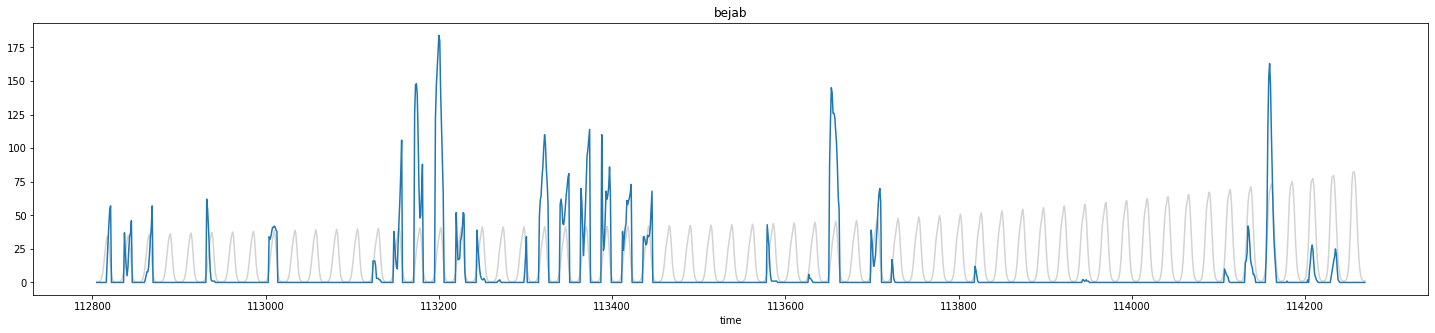

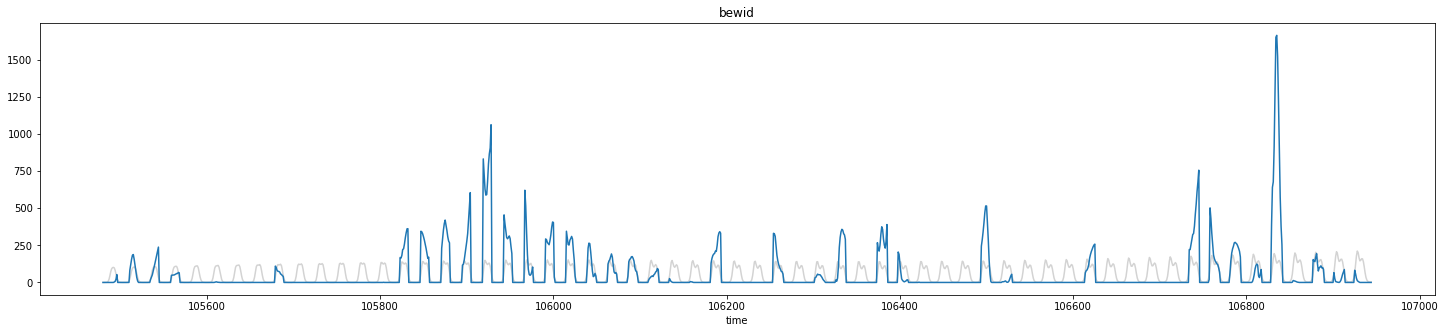

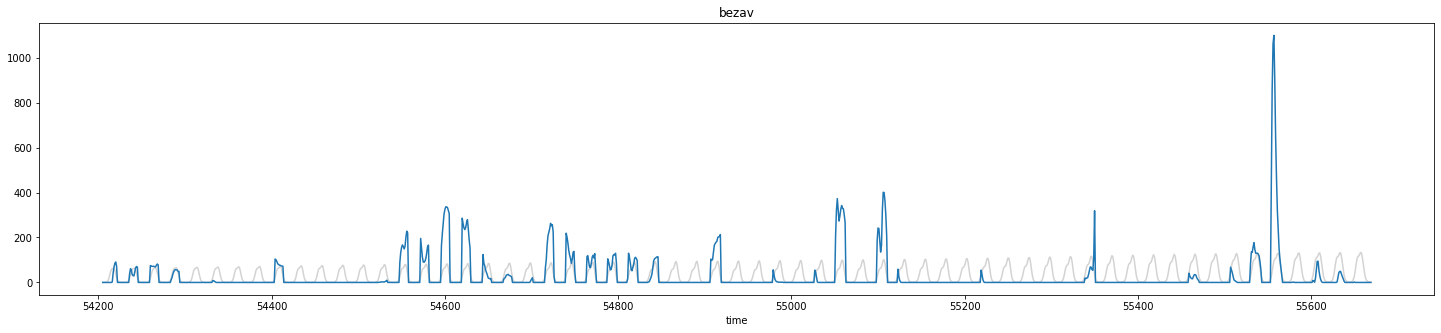

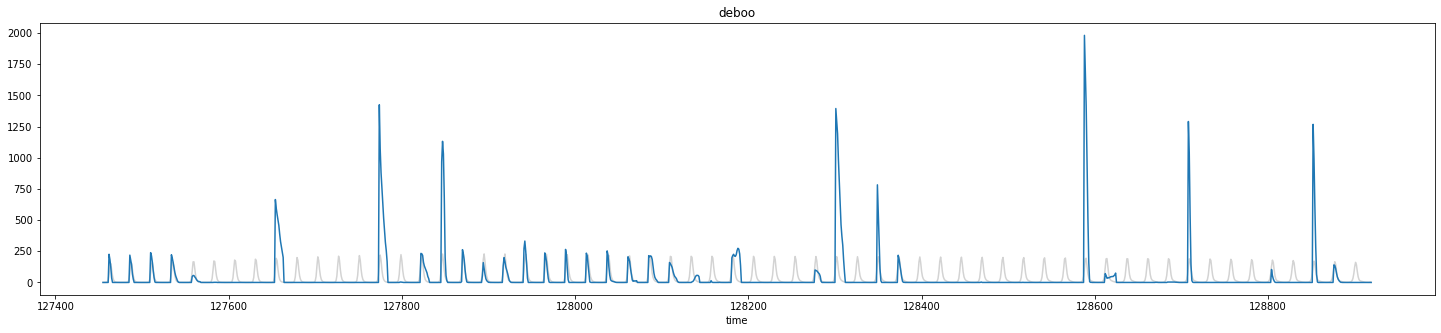

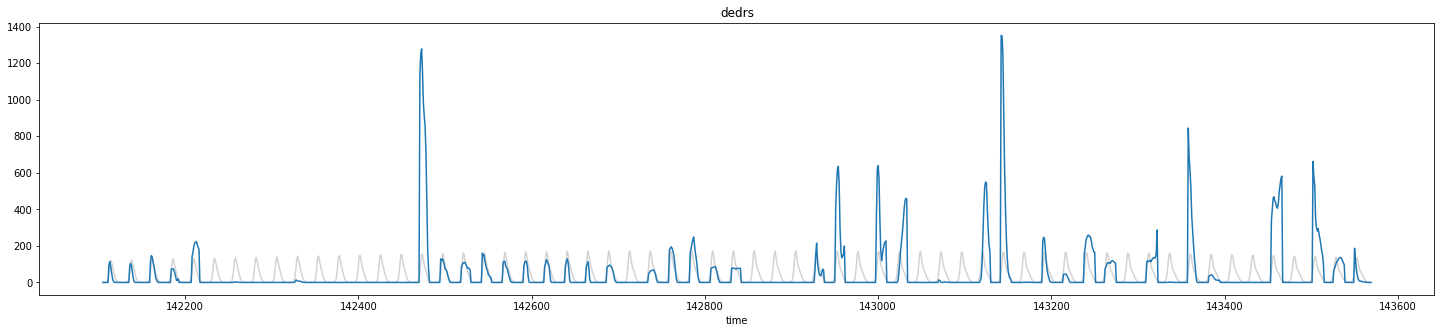

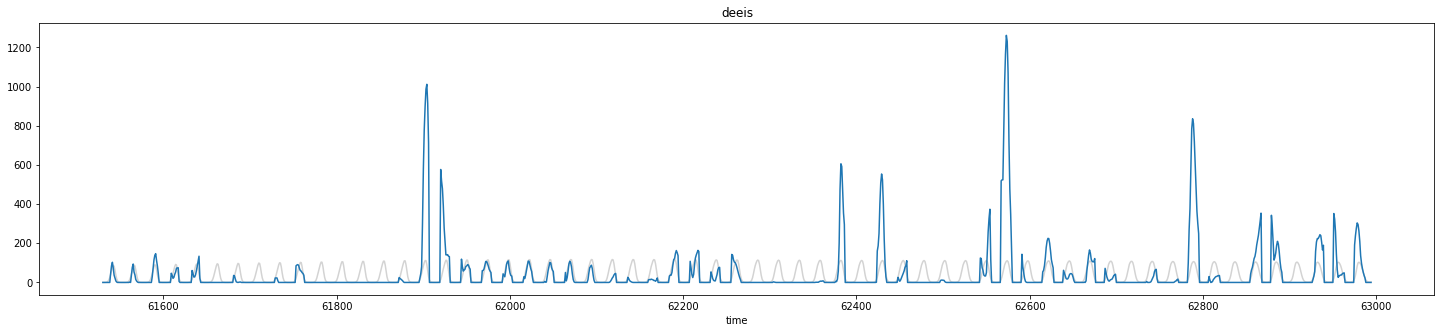

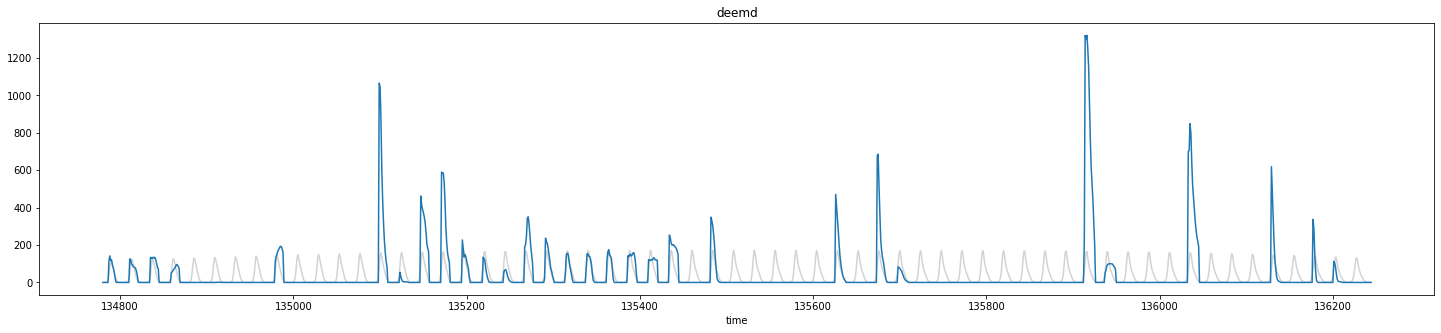

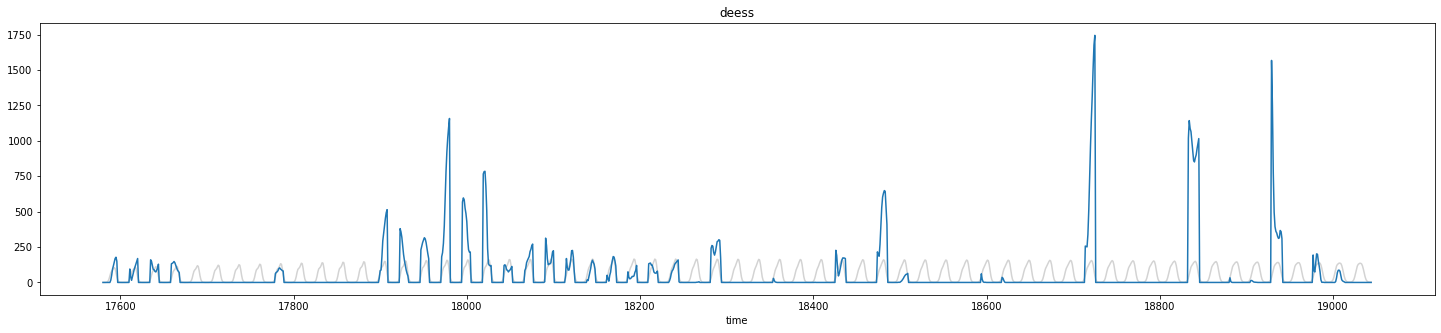

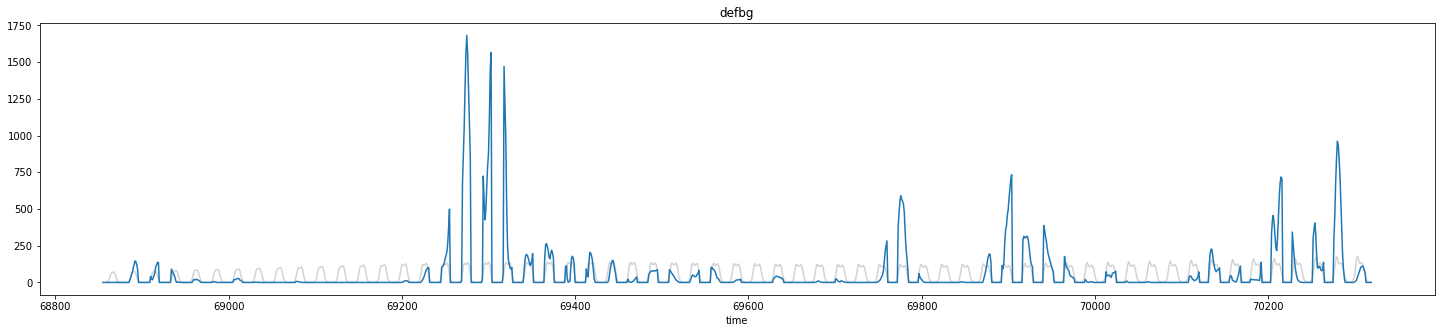

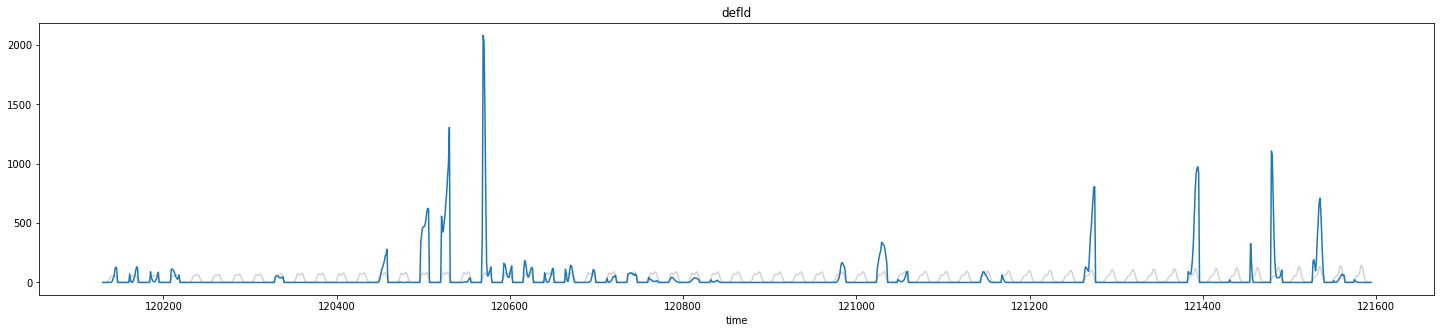

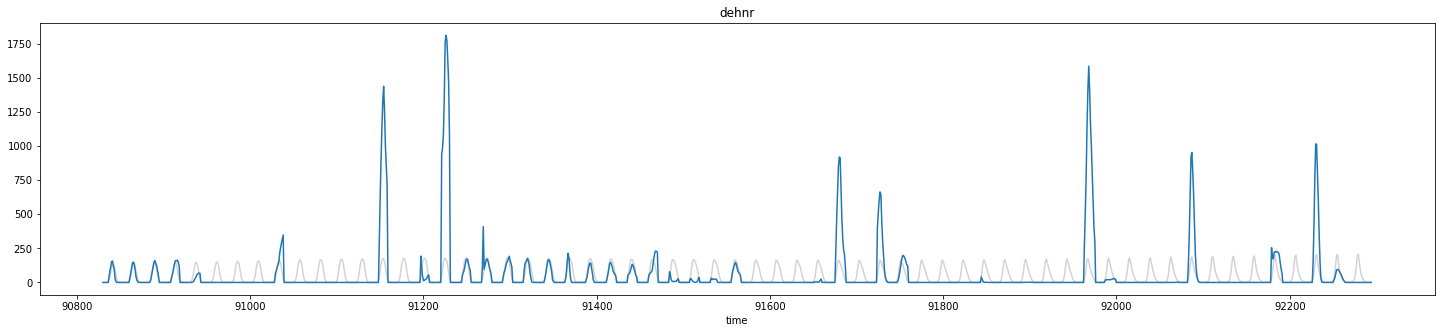

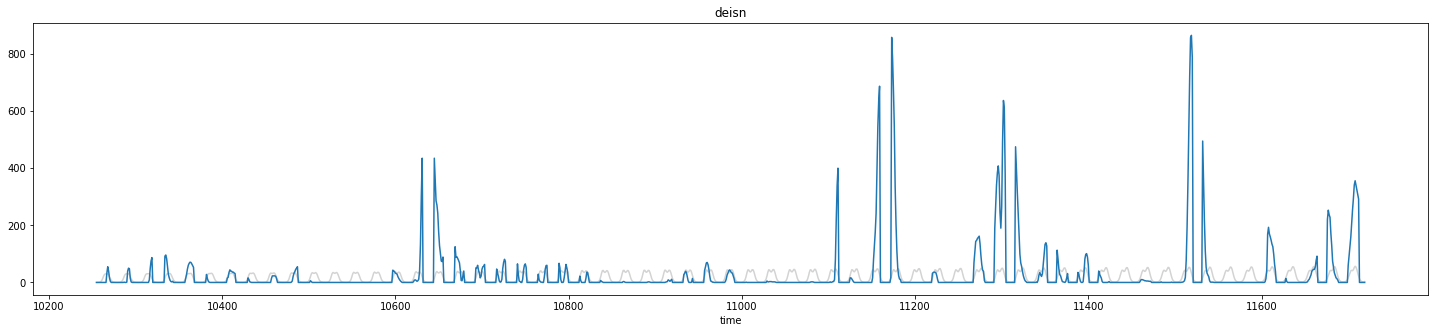

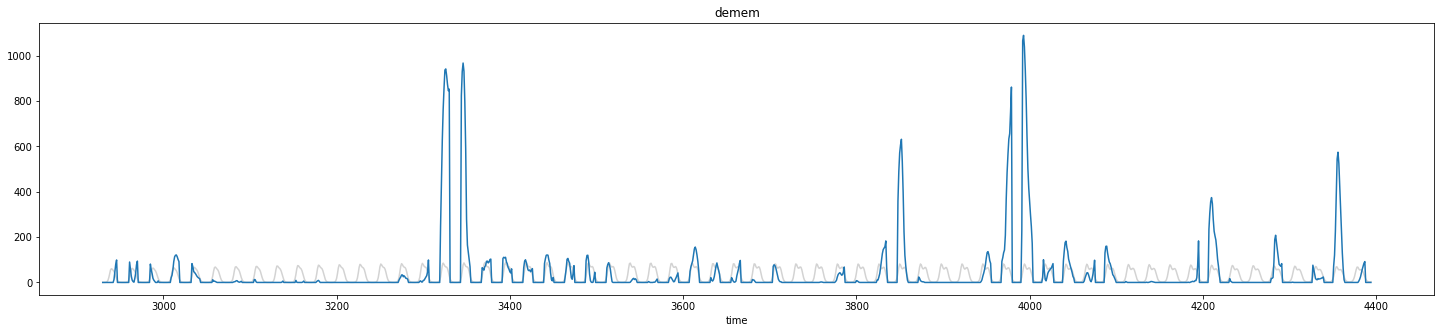

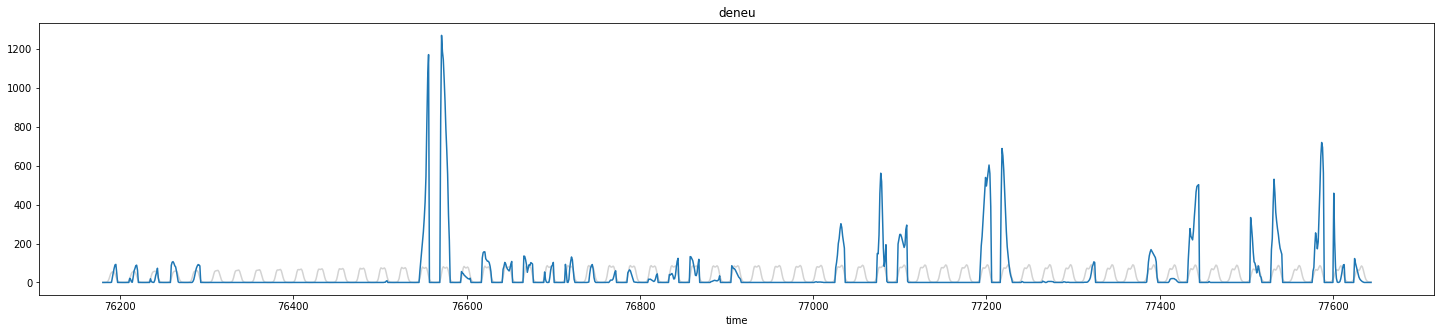

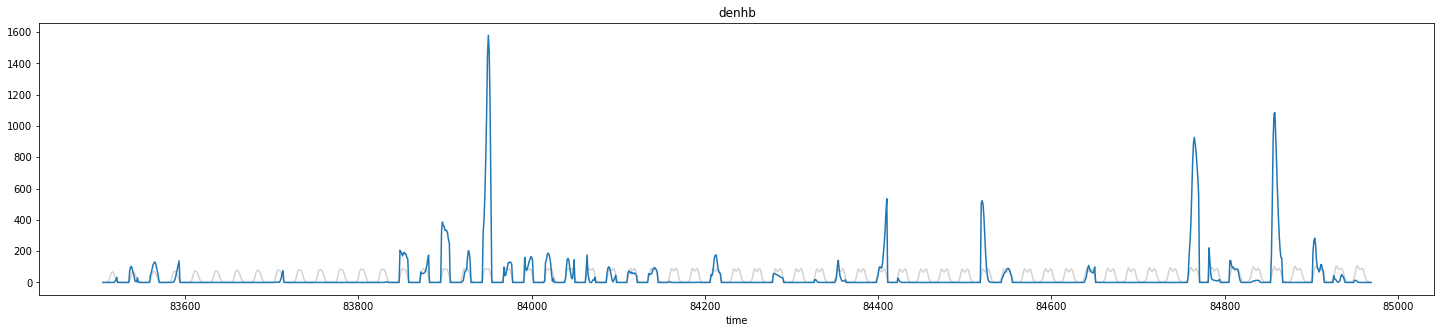

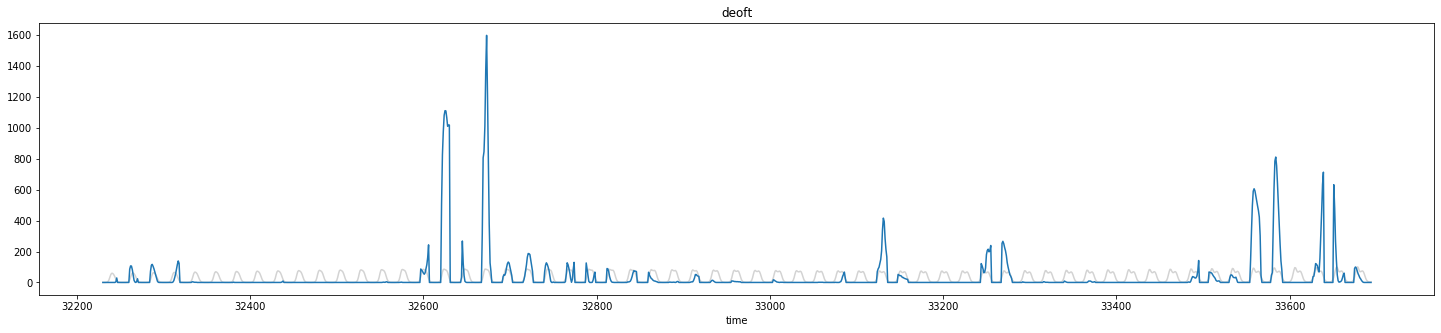

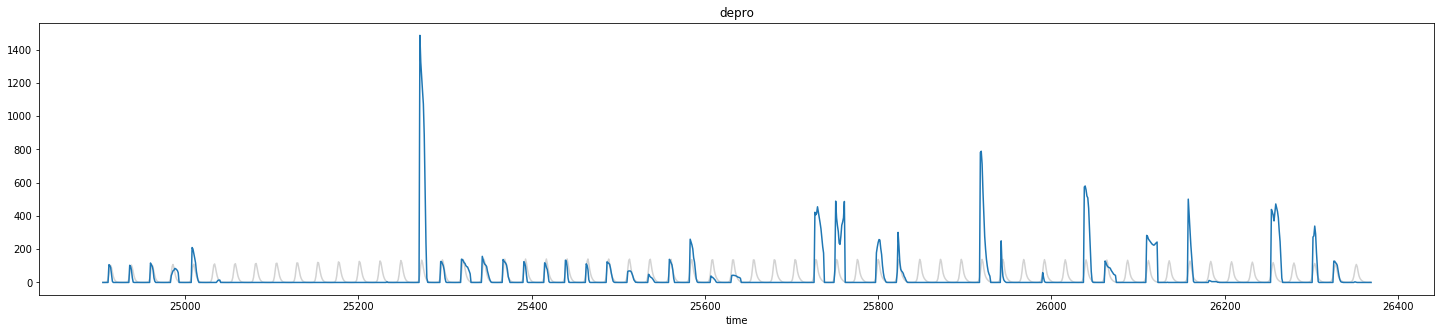

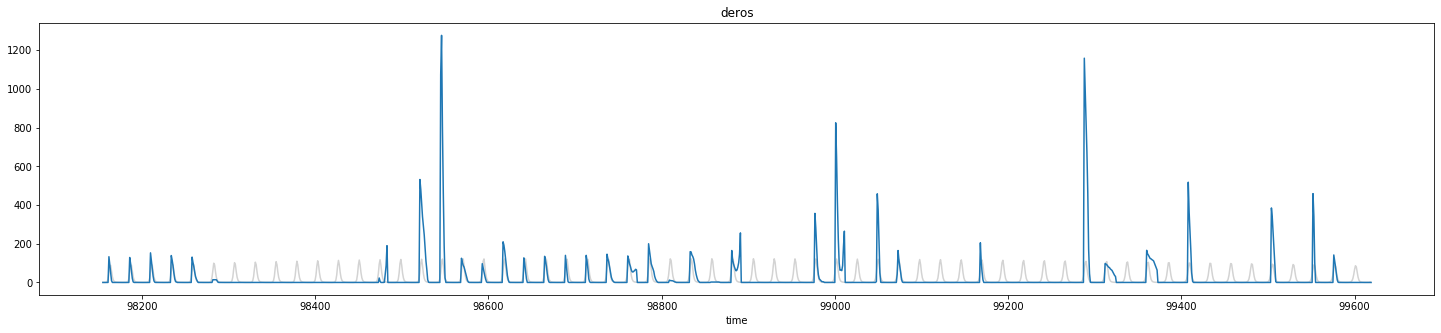

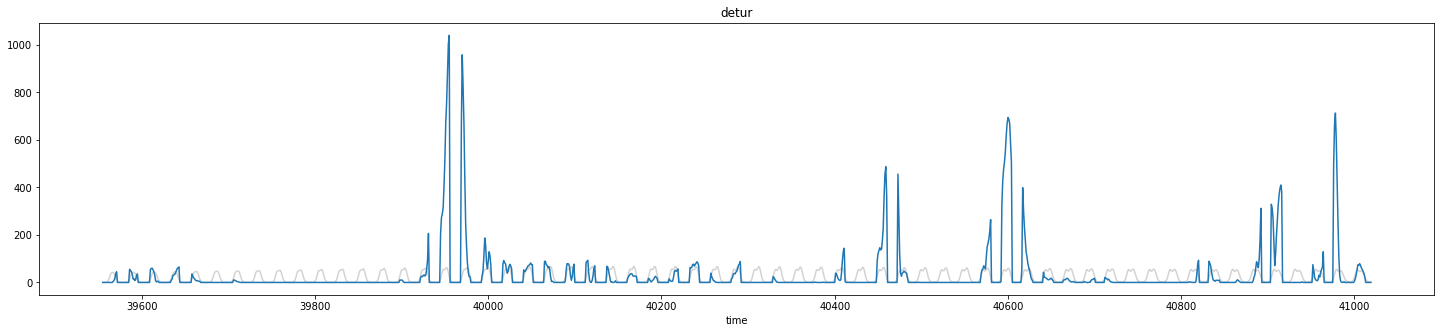

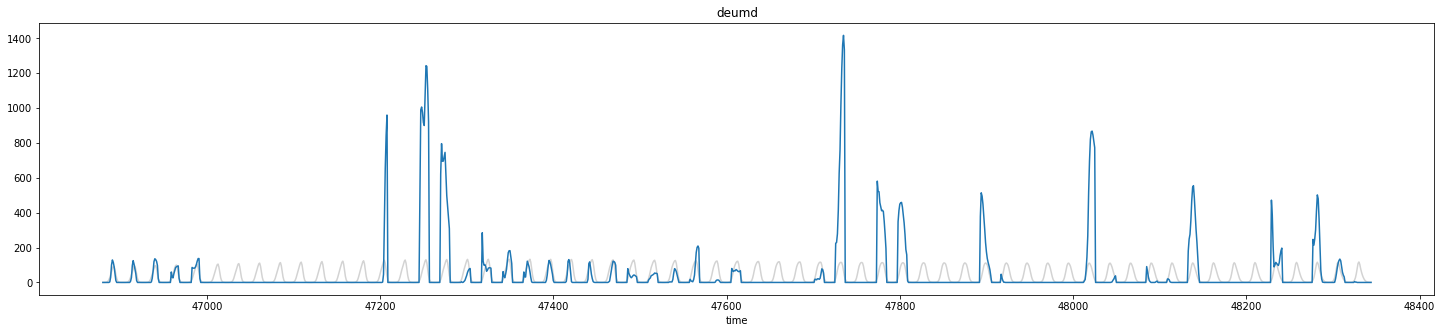

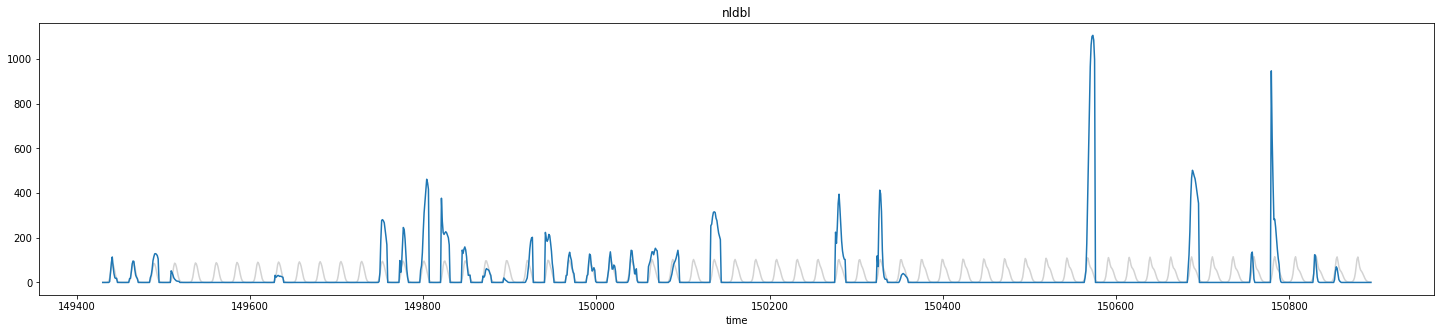

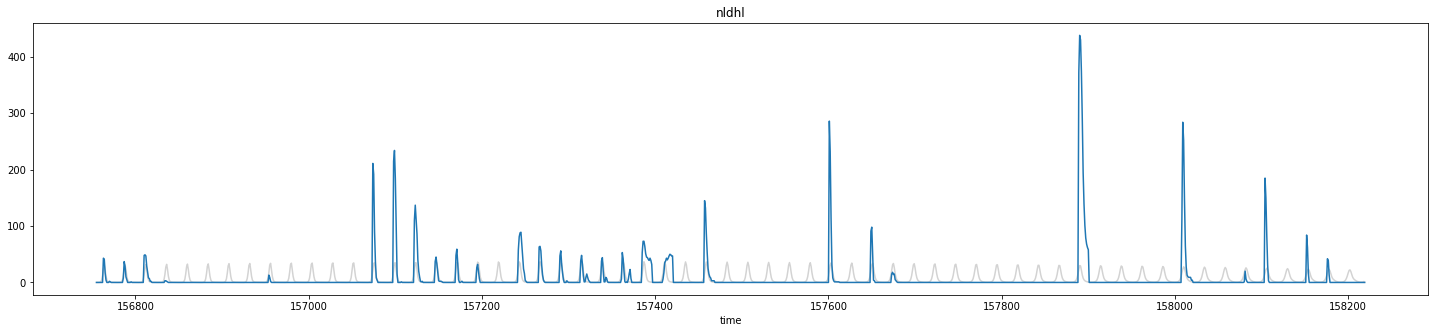

In [73]:
v_max = df.vid.max()
for r, data in df.groupby('radar'):
    fig, ax = plt.subplots(figsize=(25,5))
    ax.plot(data[data.year==2017].gam_prediction, c='lightgray')
    ax.plot(data[data.year==2017].vid)
    ax.set(title=r, xlabel='time')
    fig.savefig(f'{r}_gam.png')
    #plt.close(fig)
    #break
